In [1]:
import sys
sys.path.append("..")

from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *
from libs.convex_hull import *
from libs.alpha_shape import *
from libs.weight_generator import *

/home/martin/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
time_of_selected_moment = 42.24

In [3]:
england_df = compile_team_tracking_data("../data","England")


In [4]:
data_df = extract_one_match(england_df, 4)
original_df = data_df 

In [5]:
first_match = data_df[data_df["match_id"] == 1]
index_of_corner = first_match[first_match["Time [s]"].between(time_of_corner-1, time_of_corner+1)].index[0]

In [6]:
import pandas as pd
import numpy as np

def filter_by_ball_radius(data, index, radius):
    # Get the ball position at the specified index
    ref_ball_x = data.at[index, 'ball_x_team']
    ref_ball_y = data.at[index, 'ball_y_team']
    
    # Calculate the distance of each row's ball position from the reference position
    distances = np.sqrt((data['ball_x_team'] - ref_ball_x)**2 + (data['ball_y_team'] - ref_ball_y)**2)
    
    # Filter rows where the distance is less than or equal to the radius
    filtered_data = data[distances <= radius]
    
    return filtered_data


In [7]:
data_df = filter_by_ball_radius(data_df, index_of_corner, 5)

In [8]:
print(len(data_df))

5003


In [9]:
function_1 = lambda x : 200 - x
function_2 = lambda x : 1/x
function_3 = lambda x : np.exp((-x/40))

In [10]:

control_results = most_similar_with_wasserstein(index_of_corner, data_df, lambda x:1,normalizing_factor=12)
function_1_results = most_similar_with_wasserstein(index_of_corner, data_df, function_1,normalizing_factor= 2200, max_weight=195)
function_2_results = most_similar_with_wasserstein(index_of_corner, data_df, function_2,max_weight=1)
function_3_results = most_similar_with_wasserstein(index_of_corner, data_df, function_3,max_weight=1)



        home_6_x   home_6_y   home_1_x  home_1_y  home_10_x  home_10_y  \
540   -37.290260  -2.787178 -50.764545 -1.079776  -4.526245  -1.828018   
1033  -32.727360  17.328987 -43.066631  0.523623  -8.191053 -12.775763   
1081  -32.186218  15.369570 -43.013371  0.566434  -7.459801 -13.612037   
17568 -25.659166   9.012510 -40.815754  4.207187  -4.841258   1.702055   
23003 -22.506197  -4.969710 -39.020309 -7.534316   2.404628  -4.911590   

       home_11_x  home_11_y   home_2_x   home_2_y  ...  home_24_x  home_24_y  \
540   -25.677553   5.612628 -32.465500 -19.529156  ...        NaN        NaN   
1033   -1.222537  24.914318 -18.485426 -24.229918  ...        NaN        NaN   
1081    0.662110  24.961201 -18.246439 -26.137337  ...        NaN        NaN   
17568   1.324650  28.230032 -12.639800 -21.451822  ...        NaN        NaN   
23003   8.065908  21.101599  -8.858491 -33.057400  ...        NaN        NaN   

       home_17_x  home_17_y  home_14_x  home_14_y  home_3_x  home_3_y  \
5

In [11]:
print(function_1_results)

[481242, 477395, 222301, 265515, 394948, 481290, 337923, 323890, 651197, 91232, 348260, 651431, 23003, 449717, 637192, 520910, 370259, 140606, 520862, 589481, 359590, 642323, 177639, 520814, 386893, 61086, 449765, 477443, 637144, 520766, 449813, 520976, 24942, 503606, 387028, 129623, 433976, 392868, 368724, 305542, 449861, 642371, 521024, 284428, 324416, 386367, 324272, 618109, 180863, 361717, 449909, 284476, 387076, 295216, 402011, 457012, 370387, 60071, 637096, 305590, 1081, 358193, 628165, 291000, 295168, 303660, 17568, 1033, 361175, 60023, 358241, 361467, 309609, 242743, 410537, 542195, 314167, 37024, 314215, 265712, 224622, 102543, 54088, 170458, 509801, 154060, 229853, 231325, 518585, 540, 453828, 520396, 520348, 66714, 110394, 215007, 31756, 518895, 443561, 31671, 31623, 576375, 576229, 301153, 102126]


In [12]:


rip_k_corner = ripley_k_by_indices(data_df, [index_of_corner])
rip_k_whole_match = ripley_k_by_indices(data_df.iloc[::48], data_df.iloc[::48].index.to_numpy())

In [13]:
rip_k_control = ripley_k_by_indices(data_df, control_results[:10])
rip_k_function_1 = ripley_k_by_indices(data_df, function_1_results[:10])
rip_k_function_2 = ripley_k_by_indices(data_df, function_2_results[:10])
rip_k_function_3 = ripley_k_by_indices(data_df, function_3_results[:10])

here
here
here
here
here
here


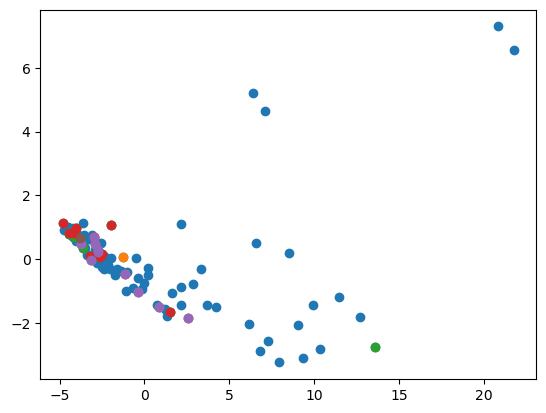

In [14]:
pca_obj = PCAObject(rip_k_whole_match)

components_match = pca_obj.transform(rip_k_whole_match)
components_corner = pca_obj.transform(rip_k_corner)
components_control = pca_obj.transform(rip_k_control)
components_func_1 = pca_obj.transform(rip_k_function_1)
components_func_2 = pca_obj.transform(rip_k_function_2)
components_func_3 = pca_obj.transform(rip_k_function_3)



plt.scatter(components_match[:,0],components_match[:,1])
plt.scatter(components_func_1[:,0], components_func_1[:,1])
plt.scatter(components_func_2[:,0], components_func_2[:,1])
plt.scatter(components_func_3[:,0], components_func_3[:,1])
plt.scatter(components_control[:,0],components_control[:,1])
plt.scatter(components_corner[:,0], components_corner[:,1])
plt.show()


In [17]:
generate_folder("function_1_top_10")
generate_folder("function_2_top_10")
generate_folder("function_3_top_10")
generate_folder("control_top_10")
generate_folder("target_situation")
k=10

generate_pitches_from_start_indices(function_1_results[:k], original_df, "function_1_top_10",1, 1)
generate_pitches_from_start_indices(function_2_results[:k], original_df, "function_2_top_10",1, 1)
generate_pitches_from_start_indices(function_3_results[:k], original_df, "function_3_top_10",1, 1)
generate_pitches_from_start_indices(control_results[:k], original_df,"control_top_10",1,1)
generate_pitches_from_start_indices([index_of_corner], original_df, "target_situation",1, 1)


Folder 'function_1_top_10' has been removed successfully.
Folder 'function_2_top_10' has been removed successfully.
Folder 'function_3_top_10' has been removed successfully.
Folder 'control_top_10' has been removed successfully.
Folder 'target_situation' has been removed successfully.
